# Snapshot: Do not change!

# Test 2D Levy flight in deterministic fitness landscape
## The flights in each dimension are dependent

Potential interpolated from grid data, `./input/landscape1.csv`

Grid data for potential taken from `/home/ochab/Dropbox/backup/ecoli/maple/fitness_new03.mw`

# Uwaga!
Levy Flight jako proces symulujący spacer po krajobrazie dostosowania jest trudny matematycznie, bo:

1. Powoduje problemy numeryczne na brzegach: Gdy x lub y jest blisko 0, to przy używanym tutaj potencjale (-funkcja fitness) włącza się adaptacyjny bardzo mały krok czasowy i symulacja się zawiesza. Można ustalić sztuczne ograniczenie na krok czasowy, ale to oznacza, że numerycznie symulacja już nie produkuje ścisłego matematycznie lotu Levy'ego.

Inne problemy:

2. Potrzeba zdefiniować warunki brzegowe w x,y=0. 
    1. Wcześniej zdefiniowałam pozostawanie w poprzednim punkcie. 
    2. Teraz zdefiniowałam losowanie do skutku. 
    Jest to tak czy inaczej arbitralne.
3. Potrzeba zdefiniować warunki brzegowe w sytuacji, gdy fitness < 0
4. Nawet przy takich sztucznych ustawieniach, histogramy z wielu symulacji pokazują, że trajektorie pałętają się głównie przy brzegach x=0, y=0. Dlaczego? Przecież fitness ma globalne maksimum gdzie indziej. 
    1. Wygląda na to, że zależy to od warunków początkowych.
    2. Reprezentatywne próbkowanie całej przestrzeni jest niemożliwe, zajmie za dużo czasu obliczeniowego.
5. Trzeba by odrzucać możliwość ewolucji w dół fitness.
6. Zrobić nową gałąź do tej symulacji.

In [1]:
# %run run.py 

In [1]:
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
import pandas as pd

from run import run

In [2]:
input_dir="./input/"
# input_data_file = "in.csv"
input_data_file = "landscape1.csv"
potentialfile = input_dir+input_data_file
output_dir="./output/"
output_log_file="out.log"

In [3]:
# TN
input_data_file_second = "landscape2.csv"
potentialfile_second = input_dir + input_data_file_second


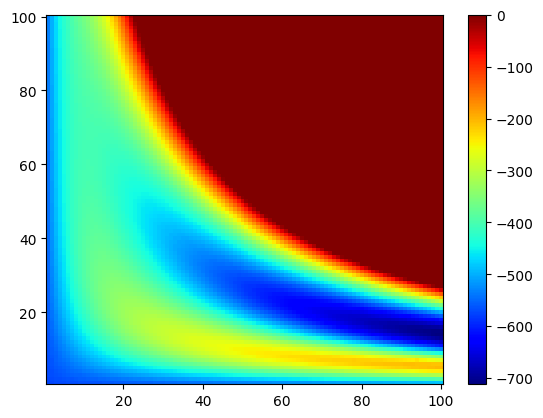

In [4]:
dfv=pd.read_csv(input_dir+input_data_file)
nx = int( dfv['kmr'].max() - dfv['kmr'].min() + 1)
ny = int( dfv['kr'].max() - dfv['kr'].min() + 1)

X = dfv['kmr'].values.reshape(nx,ny).T
Y = dfv['kr'].values.reshape(nx,ny).T
Z = dfv['fitness'].values.reshape(nx,ny).T
fig, ax = plt.subplots(1,1)
c = ax.pcolormesh(X,Y,Z,vmax=0, cmap = plt.cm.jet)
fig.colorbar(c , ax=ax) 
plt.show()

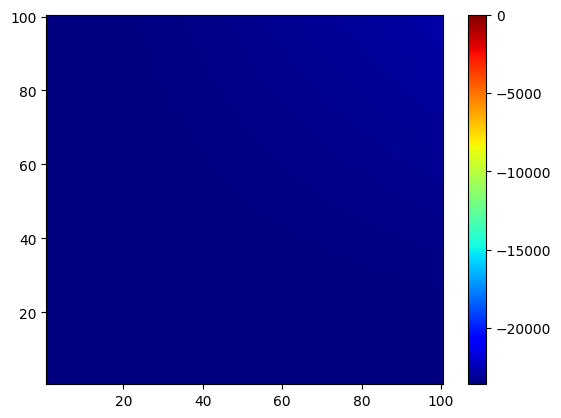

In [5]:
#TN
dfv2=pd.read_csv(input_dir+input_data_file_second)
nx2 = int( dfv2['kmr'].max() - dfv2['kmr'].min() + 1)
ny2 = int( dfv2['kr'].max() - dfv2['kr'].min() + 1)

X2 = dfv2['kmr'].values.reshape(nx2,ny2).T
Y2 = dfv2['kr'].values.reshape(nx2,ny2).T
Z2 = dfv2['fitness'].values.reshape(nx2,ny2).T
fig2, ax2 = plt.subplots(1,1)
c2 = ax2.pcolormesh(X2,Y2,Z2,vmax=0, cmap = plt.cm.jet)
fig2.colorbar(c2 , ax=ax2) 
plt.show()

In [23]:
T1=1e2
Ntraj1=1
dt1=0.001
minDt = 0. #1e-1
eta=0.1
D = 10. #1. #0.1
gamma = 1. #0.5
alpha=1.9
x0=40.
y0=15.
kmr1 = 95.   # Kmr2 > Kmr1
kmr2 = 100.  
kr1 = 15.    # Kr2 > Kr1
kr2 = 20.
output_data_file=f"outT{T1:.0e}N{Ntraj1:.0e}dt{dt1:.0e}_single_traj.csv"

run(
    output_dir,
    output_data_file,
    output_log_file,
    alpha=alpha, 
    D=D,
    gamma = gamma,
    dt=dt1, 
    minDt=minDt,
    eta=eta,
    T=T1,
    t0=0., 
    x0=x0,
    y0=y0,
    kmr1 = kmr1,
    kmr2 = kmr2,
    kr1 = kr1,
    kr2 = kr2,
    seed = 785130169,
    potentialfile=potentialfile,
    potentialfile_second=potentialfile_second
)

print(open('./output/out.log', 'r').read()) 

alpha = 1.9
D = 10
gamma = 1
dt = 0.001
minDt = 0
eta = 0.1
T = 100
t0 = 0
x0 = 40
y0 = 15
potential_file = ./input/landscape1.csv
potential_file_second = ./input/landscape2.csv
kmr1 = 95
kmr2 = 100
kr1 = 15
kr2 = 20
seed = 785130169
Ntraj = 1
Whole single trajectory will be printed as the output.
Running the simulation...

-------------launch_2D_1traj_potential_file()-----------
potential_file=./input/landscape1.csv
potential_file_second=./input/landscape2.csv
Simulation stopped at:
X: 95
Y: 18
Z: -641.63
Output written to STDOUT.
Done.




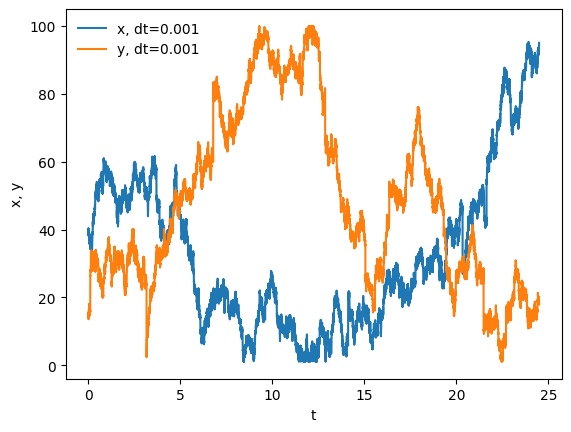

In [24]:
df=pd.read_csv(output_dir+output_data_file)

fig, ax = plt.subplots(1,1)
ax.plot(df.t, df.x , label=f"x, dt={dt1}")
ax.plot(df.t, df.y , label=f"y, dt={dt1}")
ax.legend(loc='best', frameon=False)
ax.set_xlabel("t")
ax.set_ylabel("x, y")
plt.show()

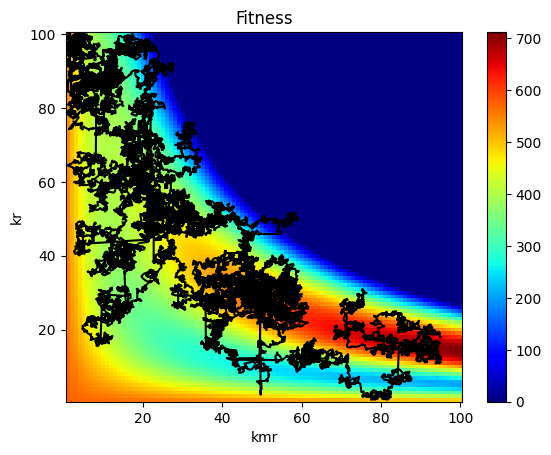

In [25]:
import matplotlib.pyplot as plt
import numpy as np

# generate 2 2d grids for the x & y bounds
x,y = np.meshgrid( np.linspace(df.x.min(), df.y.max(), 100), np.linspace(df.y.min(), df.y.max(), 100))

fig, ax = plt.subplots()


ax.plot(df.x,df.y, color='black')
c = ax.pcolormesh(X,Y,-Z,vmin=0, cmap = plt.cm.jet)


ax.set_title('Fitness')
ax.set_xlabel('kmr')
ax.set_ylabel('kr')
# set the limits of the plot to the limits of the data
# ax.axis([x.min(), x.max(), y.min(), y.max()])
# fig.colorbar(c, ax=ax)
fig.colorbar(c , ax=ax) 
plt.show()


In [9]:
T1=5.
Ntraj1=10000
dt1=0.001
minDt = 0. #1e-1
eta=0.1
D = 10. #0.1
gamma = 1. #0.5
alpha=1.9
x0=40.
y0=15.
kmr1 = 95.      # Kmr2 > Kmr1
kmr2 = 100.     
kr1 = 15.       # Kr2 > Kr1
kr2 = 20.
lvl = -650

output_data_file=f"outT{T1:.0e}N{Ntraj1:.0e}dt{dt1:.0e}_ensemble.csv"

run(
    output_dir,
    output_data_file,
    output_log_file,
    alpha=alpha, 
    D=D,
    gamma = gamma,
    dt=dt1, 
    minDt=minDt,
    eta=eta,
    T=T1, 
    t0=0., 
    x0=x0,
    y0=y0,
    kmr1 = kmr1,
    kmr2 = kmr2,
    kr1 = kr1,
    kr2 = kr2,
    Ntraj=Ntraj1,
    seed = 785130169,
    potentialfile=potentialfile,
    potentialfile_second=potentialfile_second
)

print(open('./output/out.log', 'r').read()) 

alpha = 1.9
D = 10
gamma = 1
dt = 0.001
minDt = 0
eta = 0.1
T = 5
t0 = 0
x0 = 40
y0 = 15
potential_file = ./input/landscape1.csv
potential_file_second = ./input/landscape2.csv
kmr1 = 80
kmr2 = 90
kr1 = 15
kr2 = 25
seed = 785130169
Ntraj = 10000
Only end points of the 10000 trajectories will be printed as the output.
Running the simulation...

-------------launch_2D_ensemble_potential_file()-----------
potential_file=./input/landscape1.csv
potential_file_second=./input/landscape2.csv
Average time of simulation: 4.59828
Time simulation variance: 0.912539
Output written to STDOUT.
Done.




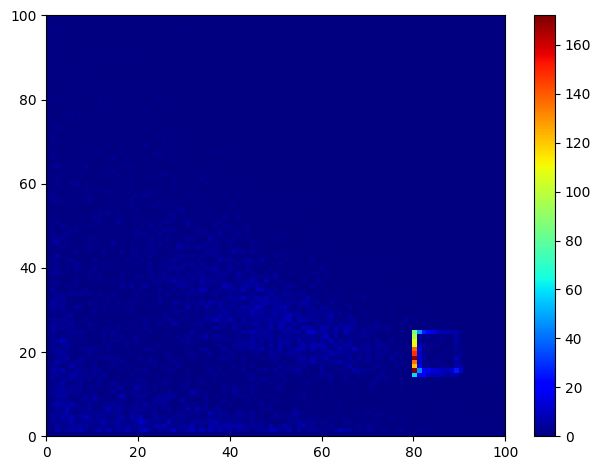

In [10]:
df1=pd.read_csv(output_dir+output_data_file)


fig, ax = plt.subplots(1,1)
Nbins = 100
x_bins = np.linspace(0, 100, Nbins)
y_bins = np.linspace(0, 100, Nbins)
h = ax.hist2d(np.array(df1.x), np.array(df1.y), bins =[x_bins, y_bins], cmap = plt.cm.jet) # nipy_spectral
fig.colorbar(h[3] , ax=ax) 
plt.tight_layout() 
plt.show()